## Libraries

In [1]:
# Set the graphs as interactive.
%matplotlib inline
# Import necessary libraries for initial analysis
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as color

from scipy import stats
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


# Pre-processing numerical features 

In [2]:
cookies = pd.read_csv("../data/cookies.csv")
cookies_validate =  pd.read_csv("../data/cookies_validate.csv")

In [3]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [4]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [5]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5198.000000,5193.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5198.000000,5188.000000,5198.000000,5198.000000,5198.0,5198.000000,5198.000000
mean,0.318049,5.402465,559.638322,30.390246,115.015294,0.995819,8.222020,0.530864,10.494758,7.325125,14.381935,7.0,1.499367,3.000577
std,0.150036,4.668342,353.274062,17.268403,56.506171,0.062193,0.283323,0.150886,1.194584,1.302780,3.023740,0.0,0.289205,0.024019
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.505000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996908,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


In [6]:
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

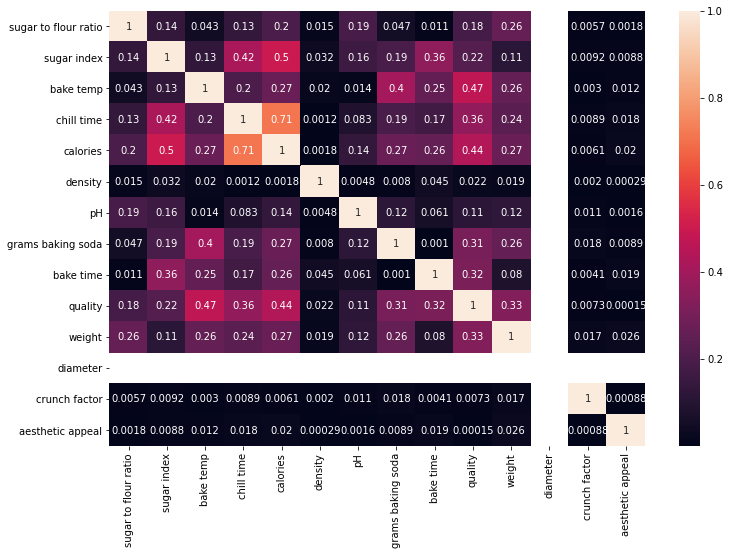

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

corrMatrix = cookies.corr().abs()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Eliminate the NaN and diameter cause doesn't make sense one column with every value with 7 (there's no corr)**

In [8]:
cookies = cookies.dropna()
cookies = cookies.drop(columns = 'diameter',axis=1)
cookies.isnull().sum()

sugar to flour ratio    0
sugar index             0
bake temp               0
chill time              0
calories                0
density                 0
pH                      0
grams baking soda       0
bake time               0
quality                 0
butter type             0
weight                  0
mixins                  0
crunch factor           0
aesthetic appeal        0
dtype: int64

**Let's see the values for string columns values and then drop de outliers with numerical values columns**

In [9]:
cookies['butter type'].unique() #For One Hot
cookies['mixins'].unique()

array(['raisins', 'nuts, chocolate', 'chocolate', 'nuts, oats, chocolate',
       'chocolate, oats', 'raisins, oats', 'nuts,raisins', 'nuts, oats',
       'chocolate, peanut butter', 'chocolate, oats, peanut butter',
       'peanut butter', 'peanut butter, raisins', 'oats'], dtype=object)

In [10]:
# we observe that mixins there's a not space applied in 'nuts,raisins', then we replace with space
cookies["mixins"] = cookies["mixins"].str.replace("nuts,raisins", "nuts, raisins")

In [11]:
z = np.abs(stats.zscore(cookies.select_dtypes(['int64', 'float64'])))
cookies = cookies[(z < 3).all(axis=1)]
cookies_float = cookies.select_dtypes(['int64', 'float64'])

**Seeking the linear regresion. If the line is flat, we eliminate them cause doesn't mean any relation significant variable**

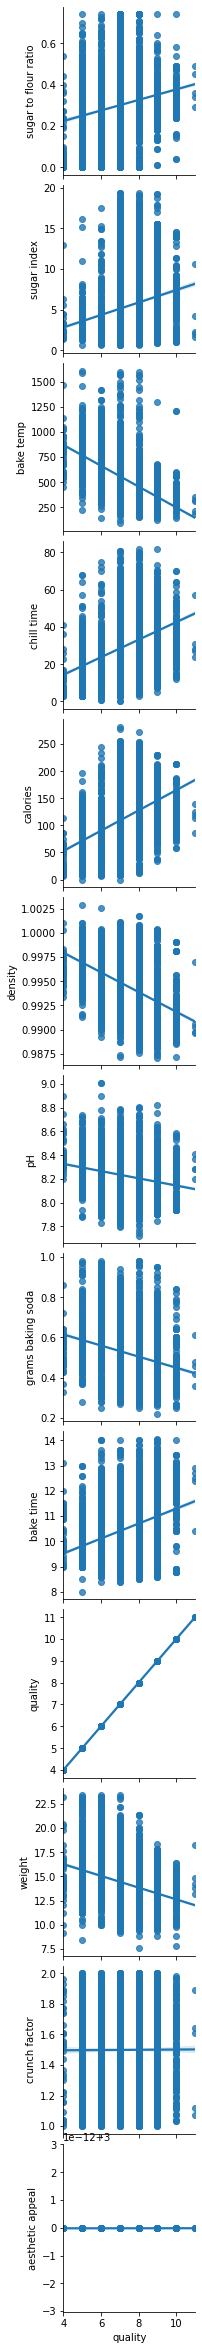

In [12]:
sns.pairplot(data = cookies_float, y_vars = cookies_float.columns,x_vars = 'quality' ,kind = 'reg' )

In [13]:
cookies = cookies.drop(columns='aesthetic appeal')

# Pre-processing categorical features

In [14]:
# define X and y (features and target)
X = cookies.drop(columns="quality")
y = cookies["quality"]

## Pipeline: ord+oneHot

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

# Define columns to use
ordinal_cols = ["mixins"]
oneHot_cols = ["butter type"]
categ_cols = ordinal_cols + oneHot_cols
X_cat = X_train[categ_cols]

# Define categories order for ordinal columns
mixins = ["chocolate", "raisins", "chocolate, oats", "nuts, chocolate", "nuts, raisins", "nuts, oats, chocolate", "nuts, oats", "chocolate, peanut butter", "raisins, oats", "peanut butter", "oats", "chocolate, oats, peanut butter", "peanut butter, raisins"]
ord_cats = [mixins]


# Initialize transformers
ord_enc = OrdinalEncoder(categories=ord_cats)
oneH = OneHotEncoder(handle_unknown="ignore")

# Assemble the "Column Transformer"
categ_encode_pipeline = ColumnTransformer([
    ("ord_encoder_branch", ord_enc, ordinal_cols),
    ("oneH_encoder_branch", oneH, oneHot_cols)
])

In [16]:
# Fit & Transform to training set
X_cat = categ_encode_pipeline.fit_transform(X_cat)